In [2]:
import math
import collections
import dataclasses
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


    IV. FORMAT OF "ghcnd-stations.txt"

    ------------------------------
    Variable   Columns   Type
    ------------------------------
    ID            1-11   Character
    LATITUDE     13-20   Real
    LONGITUDE    22-30   Real
    ELEVATION    32-37   Real
    STATE        39-40   Character
    NAME         42-71   Character
    GSN FLAG     73-75   Character
    HCN/CRN FLAG 77-79   Character
    WMO ID       81-85   Character
    ------------------------------


In [4]:
stations = np.genfromtxt('ghcnd-stations.txt', delimiter=[11,9,10,7,3,31,4,4,6], #we specify the width of each fieald
                                               names=['id','latitude','longitude','elevation','state','name',
                                                      'gsn','hcn','wmo'], #names for columns
                                               dtype=['U11','d','d','d','U3','U31','U4','U4','U6'], #types
                                               autostrip=True) #removce the spaces

By plotting the longitude against the latitude of these weather stations, we can easly demonstrate the coverage all around the world

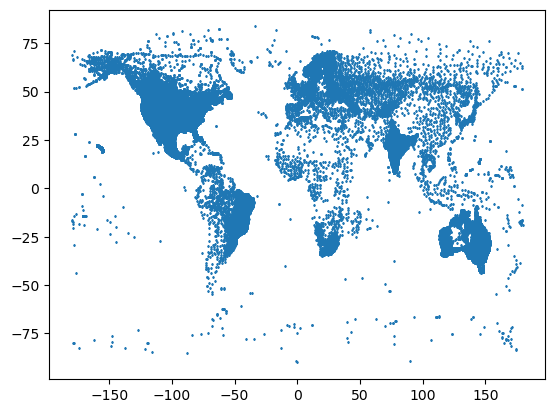

In [10]:
plt.plot(stations['longitude'],stations['latitude'], ls = ' ', marker = 'd' , ms = 1)

In [13]:
stations_TX = stations[stations['state'] == 'TX']

With the help of fancy indexing we can easily filter out specific stations. For example in this case I have selected the stations located in Texas.

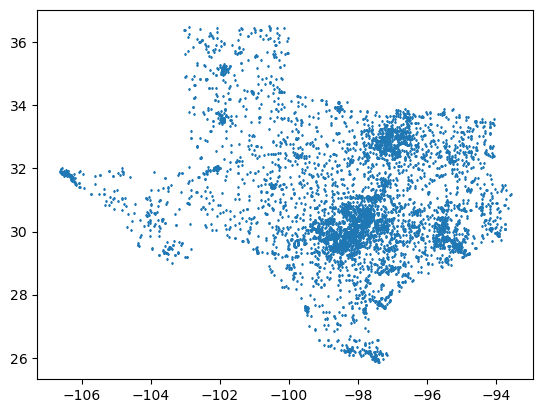

In [14]:
plt.plot(stations_TX['longitude'],stations_TX['latitude'], ls = ' ', marker = 'd' , ms = 1)

In [32]:
Dallas_stations = stations_TX[np.char.startswith(stations_TX['name'] , 'DALLAS')]

We can continue to filter out a smaller sub category by selecting the stations on in Dallas.

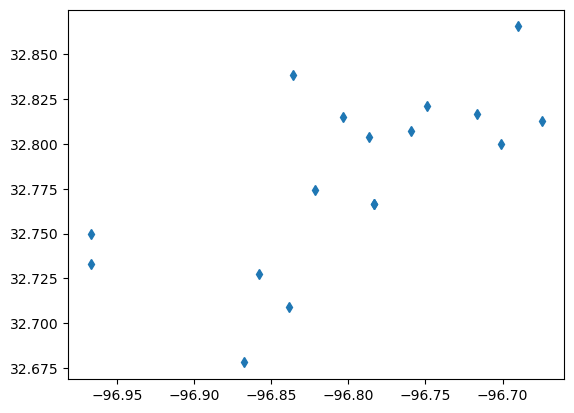

In [36]:
plt.plot(Dallas_stations['longitude'],Dallas_stations['latitude'], ls = ' ', marker = 'd' , ms = 5)

In the following section I have worked with the data which was recorded at the 'PASADENA' station in California.

In [37]:
open('PASADENA.dly','r').readlines()[0:5]

['USC00046719189301TMAX  244  6  272  6  278  6  267  6  272  6  233  6  250  6  267  6  250  6  194  6  156  6  244  6  228  6  200  6  206  6  156  6  144  6  200  6  233  6  206  6  244  6  239  6  261  6  261  6  211  6  111  6  144  6  156  6  139  6  122  6  144  6\n',
 'USC00046719189301TMIN   61  6   78  6   78  6   94  6   67  6   50  6   33  6   78  6   50  6   39  6   33  6   56  6   78  6   50  6   94  6   72  6   28  6   17  6   44  6   61  6   50  6   61  6   78  6   61  6   44  6   28  6   89  6   56  6   61  6  100  6   94  6\n',
 'USC00046719189301PRCP    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    8  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6   64  6  478  6    3  6    5  6  798  6  559  6\n',
 'USC00046719189301SNOW    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0

In [38]:
import getweather

In [39]:
help(getweather)

Help on module getweather:

NAME
    getweather

FUNCTIONS
    getdata(station_name)
        Make a pandas DataFrame with clean weather data for station_name.
        
        If station_name cannot be found, find a station that _begins_
        with station_name, but give precedence to HCN and GSN stations.
    
    getfile(station_name)
        Download the dly file for station_name, and return the local filename.
        
        If station_name is not in the list, find a station that _begins_
        with station_name, but give precedence to HCN and GSN stations.
    
    getyear(station_name, elements, year)
        Make a NumPy record array of length 365, containing weather data
        at station_name for the list of requested elements (TMIN/TMAX/PRCP/SNOW),
        restricted to year.
        
        If station_name is not in the list, find a station that _begins_
        with station_name, but give precedence to HCN and GSN stations.

DATA
    allstations = array([('ACW000116

As this project is a part of a LinkedIn data sciene course I have completed the getweather package was premade by the lecturer to handle the '.dly' files using Pandas

In [ ]:
Pasadena_tempdata = getweather.getyear('PASADENA', ['TMIN', 'TMAX'],2023)

In [47]:
Pasadena_tempdata[0:2]

array([(8.9, 15.6), (6.7, 14.4)], dtype=[('TMIN', '<f8'), ('TMAX', '<f8')])

We can check some basic informations right away.

In [64]:
print("The mean of minimum temperatures: ",np.mean(Pasadena_tempdata['TMIN']))
print("The minimum of minimum temperatures: ",np.min(Pasadena_tempdata['TMIN']))
print("The maximum of minimum temperatures: ",np.max(Pasadena_tempdata['TMIN']))

The mean of minimum temperatures:  13.027123287671232
The minimum of minimum temperatures:  2.8
The maximum of minimum temperatures:  23.3


Or check if there are any missing values:

In [ ]:
np.sum(np.isnan(Pasadena_tempdata['TMIN'])) #We can see that in this case there isn't any

0

In some cases we need an uninterrupted series of numbers. For a trivial solution we can set the nan's to the average of the column. If we would like to have a better solution we can calculate the missing values using interploitaion.

In [69]:
Pasadena_tempdata['TMIN'][np.isnan(Pasadena_tempdata['TMIN'])] = np.nanmean(Pasadena_tempdata['TMIN'])
Pasadena_tempdata['TMAX'][np.isnan(Pasadena_tempdata['TMAX'])] = np.nanmean(Pasadena_tempdata['TMAX'])

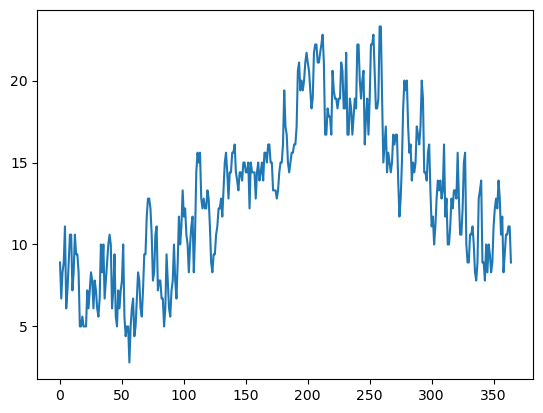

In [70]:
plt.plot(Pasadena_tempdata['TMIN'])

To try again using interpolation, we need to inport back the broken data again:

In [71]:
pasadena = getweather.getyear('PASADENA', ['TMIN', 'TMAX'], 2001)

In [72]:
good = ~np.isnan(pasadena['TMIN']) # tilde is negation
x = np.arange(0, 365)

np.interp(x, x[good], pasadena['TMIN'][good])

array([ 9.4  ,  8.3  ,  8.9  ,  8.3  , 10.   , 10.6  ,  7.2  ,  7.2  ,
        7.8  ,  6.1  ,  5.6  ,  6.1  ,  5.   ,  3.9  ,  4.4  ,  2.8  ,
        5.   ,  3.9  ,  5.6  ,  7.2  ,  7.2  ,  8.9  ,  5.6  ,  6.7  ,
        3.3  ,  5.6  ,  3.3  ,  3.3  ,  3.3  ,  3.9  ,  5.   ,  5.   ,
        6.1  ,  6.65 ,  7.2  , 13.9  , 11.1  ,  5.6  ,  2.2  ,  3.9  ,
        6.1  ,  3.3  ,  5.6  ,  6.1  ,  2.8  ,  2.8  ,  4.4  ,  7.8  ,
       10.   ,  9.4  ,  5.6  ,  5.6  ,  7.8  ,  5.   ,  3.9  ,  6.7  ,
        7.2  ,  7.8  ,  6.7  ,  5.   ,  5.6  ,  8.3  ,  9.4  , 10.   ,
        9.4  , 10.   ,  8.9  , 10.6  ,  6.1  ,  8.9  ,  8.3  ,  7.2  ,
        7.8  , 10.   , 10.   ,  7.8  , 10.6  , 13.3  , 14.4  , 10.6  ,
       11.7  , 11.1  ,  9.4  , 10.   , 12.2  , 10.   , 11.1  , 12.8  ,
       12.8  , 12.8  , 12.2  , 11.1  , 10.6  ,  8.3  ,  8.3  ,  6.1  ,
        7.2  ,  3.3  , 16.1  ,  3.9  ,  8.9  ,  7.8  ,  6.7  ,  7.2  ,
        7.2  ,  9.4  ,  9.4  , 12.2  , 11.1  ,  8.9  ,  6.1  ,  7.2  ,
      

In [73]:
def fillnans(array):
    good = ~np.isnan(array)
    x = np.arange(len(array))

    return np.interp(x, x[good], array[good])

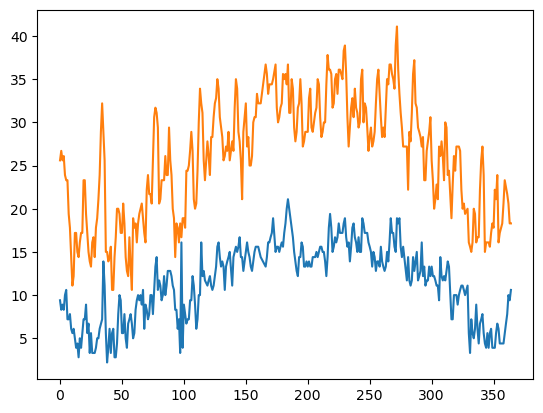

In [77]:
plt.plot(fillnans(pasadena['TMIN']))
plt.plot(fillnans(pasadena['TMAX']))

Now let's dive into another example

In [81]:
hilo = getweather.getyear('HILO', ['TMIN','TMAX'], 2000) # we read in the data from another weatherstation
hilo['TMIN'], hilo['TMAX'] = fillnans(hilo['TMIN']), fillnans(hilo['TMAX']) # we perform the interpolation to ensure continous data


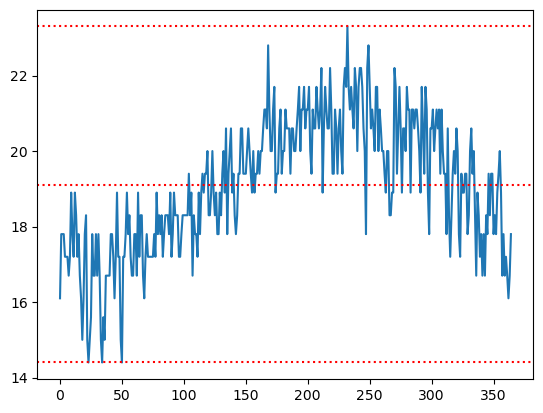

In [84]:
plt.plot(hilo['TMIN'])
# we loop over a list of functions to plot some basic statistics like min,max and average temperature alongside the data
for summary in [np.mean, np.min, np.max]:
    plt.axhline(summary(hilo['TMIN']), linestyle=':', color = 'red') # dotted line

Another common way to measure the range of variation in a time series is to compute the standard deveiation.

Standard deviation: "In statistics, the standard deviation is a measure of the amount of variation of the values of a variable about its mean." 

Calculation: The standard deviation is the square root of the variance.

Thus the variance is the is the expected value of the squared deviation from the mean of a random variable


In [85]:
mean, err = np.mean(hilo['TMIN']), math.sqrt(np.var(hilo['TMIN']))

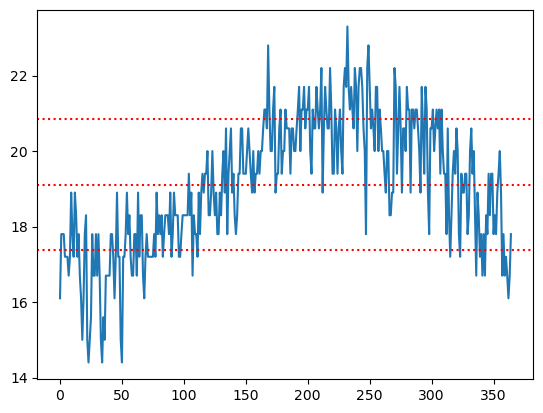

In [89]:
plt.plot(hilo['TMIN'])

for value in [mean, mean - err, mean + err]:
    plt.axhline(value, linestyle=':', color = "red")

In [90]:
rain = fillnans(getweather.getyear('HILO', ['PRCP'], 2000)['PRCP'])


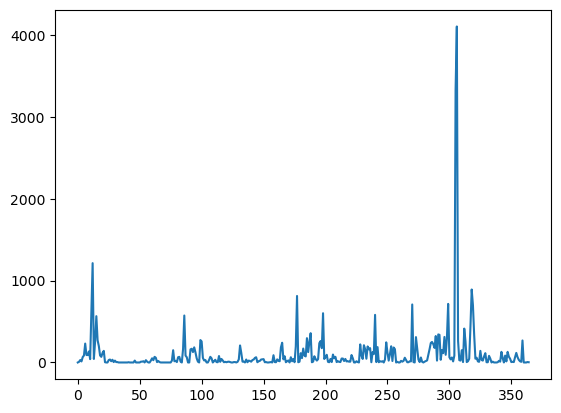

In [92]:
plt.plot(rain)


By analyzing the this data we can see that there are a lot of varitation from one day to the next due to the noise, which can obscure underlying trends. The most simple solution to this is smooting, meaning we replace each value with the average set of its neughbors, inculding itself -> we are going to use the np.convolve


In [93]:
mask = np.ones(10) / 10 #we are going to use a simple constant mask which is normalized so that it will sum to one.

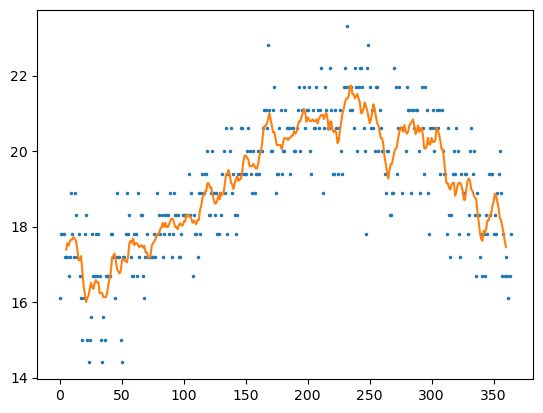

In [95]:
plt.plot(hilo['TMIN'], '.', ms=3) # smaller dots
plt.plot(range(5, 361), np.convolve(hilo['TMIN'], mask, mode='valid')) # align shorter vector

In this comparison it can be clearly seen that by using the convolution we have reduced the quick oscillations.

In [96]:
def smooth(array, window=10, mode='valid'): #with this function we can produce the smooting with and arbitry long constant mask.
    return np.convolve(array, np.ones(window)/window, mode)

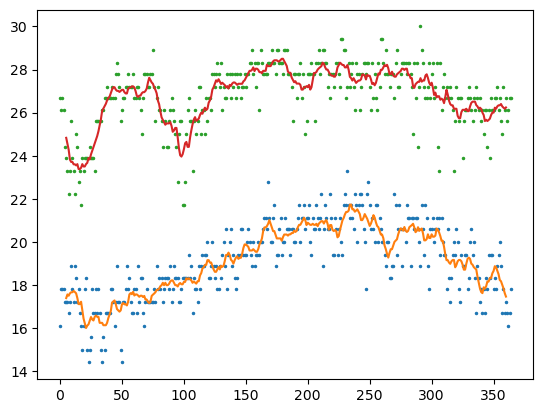

In [97]:
plt.plot(hilo['TMIN'], '.', ms=3)
plt.plot(range(5, 361), smooth(hilo['TMIN'], 10))

plt.plot(hilo['TMAX'], '.', ms=3)
plt.plot(range(5, 361), smooth(hilo['TMAX'], 10))

To compare multiple year or multiple cities, we can create a generalized function:

In [98]:
def plotsmoothed(station, year):
    # get the data
    stationdata = getweather.getyear(station, ['TMIN','TMAX'], year)

    # repeat for TMIN and TMAX
    for obs in ['TMIN','TMAX']:   
        # fill NaNs and smooth
        data = smooth(fillnans(stationdata[obs]), 20)
        # plot, setting x to the post-smoothing range
        plt.plot(range(10, 356), data)

    # add title and set axes limits
    plt.title(station)
    plt.axis(xmin=1, xmax=365, ymin=-10, ymax=45)

(1.0, 365.0, 15.0, 33.0)

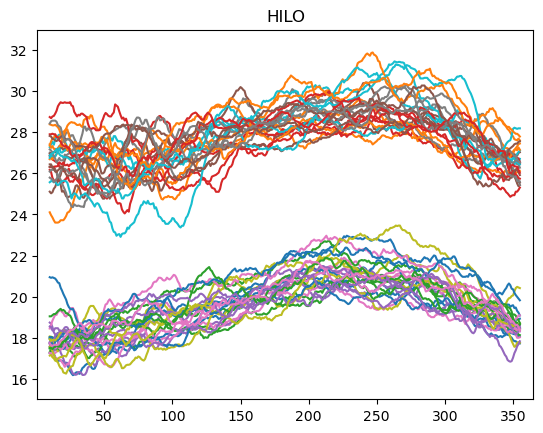

In [100]:
for year in range(2000, 2024):
    plotsmoothed('HILO', year)

plt.axis(ymin=15, ymax=33)

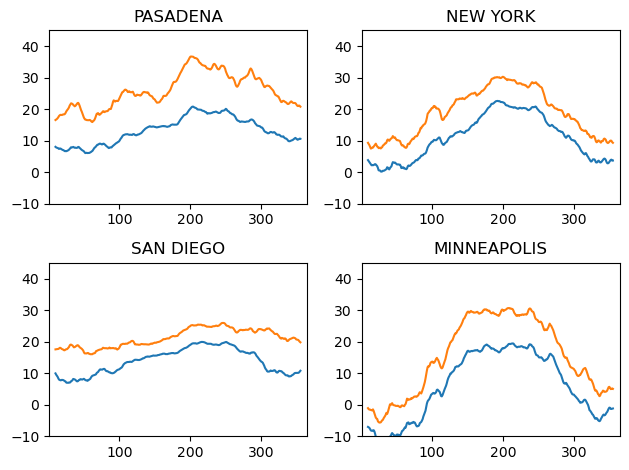

In [102]:
for i, city in enumerate(['PASADENA', 'NEW YORK', 'SAN DIEGO', 'MINNEAPOLIS'], start=1):
    plt.subplot(2, 2, i)
    plotsmoothed(city, 2023)

plt.tight_layout() # space out plots correctly

As for our last excersie we are going to create a weather chart for a specific city. To start this we will collect the 'TMIN' and 'TMAX' data for that specific city all over the year and stack them in a 2D array where each row represent one year

In [116]:
allyears = np.vstack([getweather.getyear('SEATTLE', ['TMIN','TMAX'], year)
                      for year in range(1910, 2024)])

Using ('USW00024281', 47.65, -122.3, 5.8, 'WA', 'SEATTLE URBAN SITE', '', 'HCN', '').


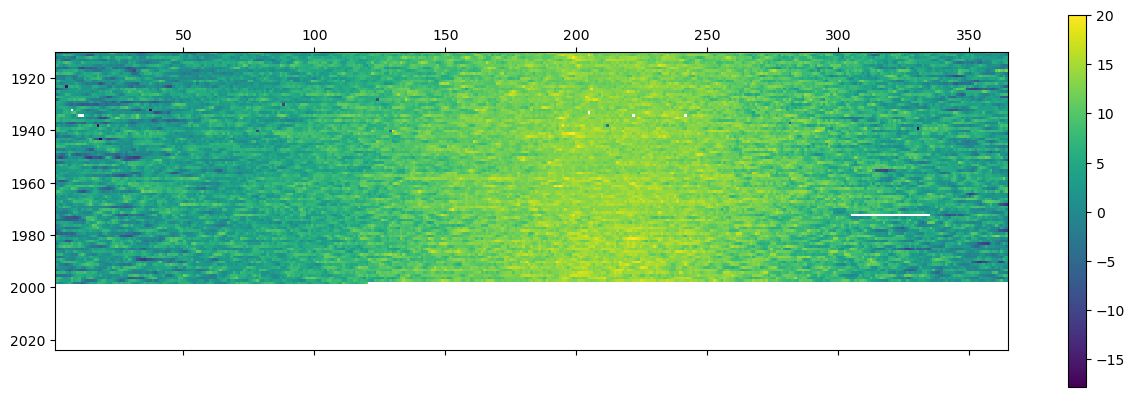

In [117]:
plt.matshow(allyears['TMIN'], extent=[1, 365, 2024, 1910])
plt.colorbar()

To extract the temperature record for each day we are going to:

In [118]:
tmin_record = np.nanmin(allyears['TMIN'], axis=0)
tmax_record = np.nanmax(allyears['TMAX'], axis=0)

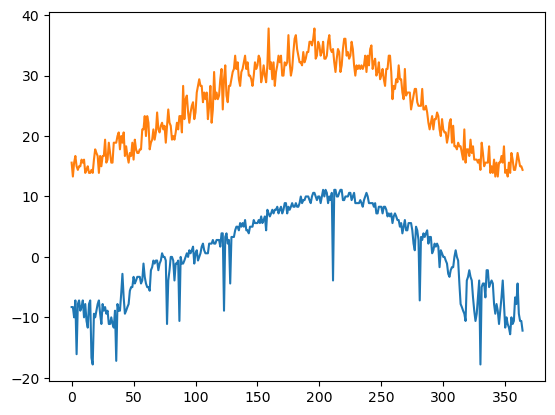

In [119]:
plt.plot(tmin_record)
plt.plot(tmax_record)

We are going the search the normal temperature range for Seattle which is defined as the averge of the low and high from 1981 to 2010 so we make another stacked array for this reduced range:

In [123]:
normal = np.vstack([getweather.getyear('SEATTLE', ['TMIN','TMAX'], year)
                    for year in range(1981, 2011)])

In [124]:
tmin_normal = np.nanmean(normal['TMIN'], axis=0)
tmax_normal = np.nanmean(normal['TMAX'], axis=0)

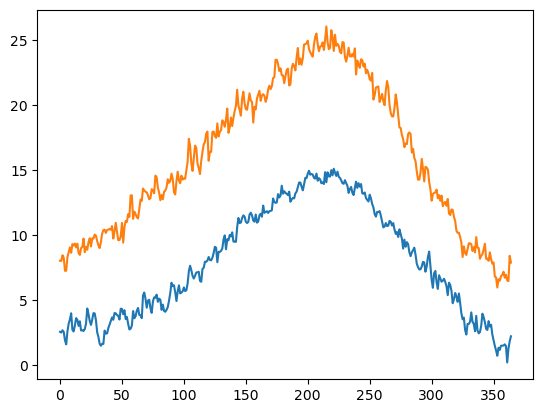

In [125]:
plt.plot(tmin_normal)
plt.plot(tmax_normal)

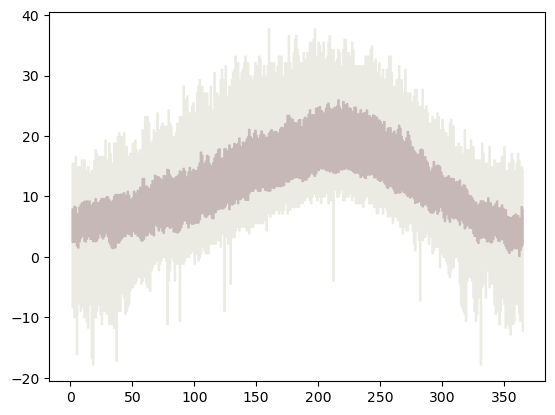

In [138]:
station, year = 'SEATTLE', 2020
thisyear = getweather.getyear(station, ['TMIN', 'TMAX'], year)

days = np.arange(1, 366)
plt.fill_between(days, tmin_record, tmax_record, color=(0.92,0.92,0.89), step='mid') # step='mid' makes blocky regions 
plt.fill_between(days, tmin_normal, tmax_normal, color=(0.78,0.72,0.72), step='mid')
plt.fill_between(days, thisyear['TMIN'], thisyear['TMAX'], color=(0.73,0.21,0.41), alpha=0.6, step='mid'); # alpha sets transparency

In [153]:
#to generalize we can make a function about the whole porcess
def nyplot(station, year):
    plt.figure(figsize=(12, 3.5))  # a better aspect ratio for the figure
     
    allyears = np.vstack([getweather.getyear(station, ['TMIN','TMAX'], year)
                          for year in range(1910, 2020)])
    
    normal = np.vstack([getweather.getyear(station, ['TMIN','TMAX'], year)
                        for year in range(1981, 2011)])

    thisyear = getweather.getyear(station, ['TMIN', 'TMAX'], year)
    
    tmin_record, tmax_record = np.nanmin(allyears['TMIN'], axis=0), np.nanmax(allyears['TMAX'], axis=0)
    tmin_normal, tmax_normal = np.nanmean(normal['TMIN'], axis=0), np.nanmean(normal['TMAX'], axis=0)

    days = np.arange(1, 366)
    plt.fill_between(days, tmin_record, tmax_record, color=(0.92,0.92,0.89), step='mid')
    plt.fill_between(days, tmin_normal, tmax_normal, color=(0.78,0.72,0.72), step='mid')
    plt.fill_between(days, thisyear['TMIN'], thisyear['TMAX'], color=(0.73,0.21,0.41), alpha=0.6, step='mid')

    plt.axis(xmin=1, xmax=365, ymin=-15, ymax=50)
    # create approximate monthly ticks for x axis
    plt.xticks(range(15, 365, 30), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
    plt.ylabel('temperature, °C')
    
    avg = 0.5 * (np.nanmean(thisyear['TMIN']) + np.nanmean(thisyear['TMAX']))
    plt.title(f'{station}, {year}: average temperature = {avg:.2f} °C');               # later

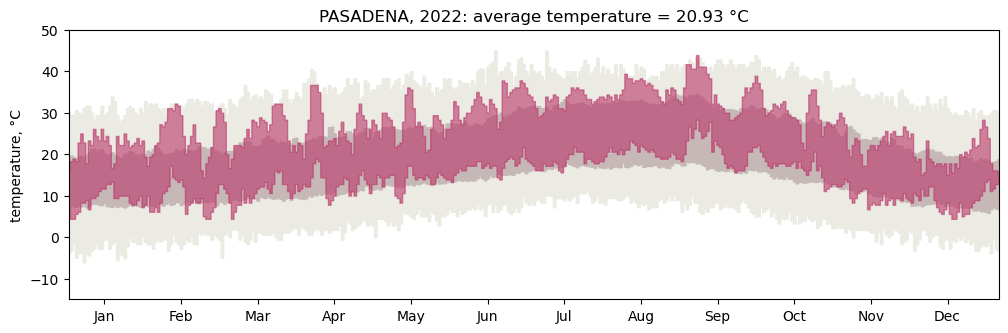

In [154]:
nyplot('PASADENA', 2022)